### Творче аналітичне завдання

Уявіть себе аналітиком компанії Yulu, з даними якої ми вже багато працювали.

Ваша задача - провести 3 самостійних аналізи на даних Yulu, кожен з яких має використовувати одну (або кілька) з освоєних нами візуалізацій і супроводжуватись висновками з побудованої вами візуалізації. 1 аналіз - це відповідь на поставлене Вами питання до даних.

Аналіз може включати або ні трансформацію даних (групування, або створення нових колонок) - це на Ваш вибір.

Тож, Вам треба задати 3 питання до даних і скористуватись при відповіді на них візуалізацією :) Питання можуть бути як прості (яка різниця між середніми показниками вологості по сезонам - побудуємо стовпачасті діаграми аби це дослідити), так і складніші - оцінюватись це буде однаково, головне, аби питання мало аналітичний сенс.

Ви можете використовувати той інструмент візуалізації, який Вам сподобався найбільше.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('drive/MyDrive/Colab/yulu_rental.csv')

In [5]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


1. Потрібно визначити яка кількість велосипедів була взята в оренду відповідно до погодних умов.

In [6]:
group_by_weather = df.groupby('weather')['count'].sum()
group_by_weather

,count
weather,
1,1476063
2,507160
3,102089
4,164


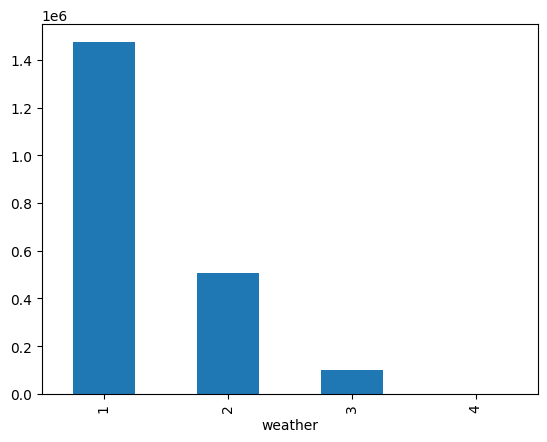

In [7]:
group_by_weather.plot(kind = 'bar');

Виходячи з даних можна зробити такі висновки, що можна скоротити робочий час прокату велосипедів в ті дні, коли переважає дощ, сніг. Оскільки ймовірність того, що велосипед буде взятий в оренду - мінімальна.

2. Визначити найпопулярніші години прокату велосипедів.

In [10]:
df['datetime'] = pd.to_datetime(df.datetime)
df['date'] = df.datetime.dt.date

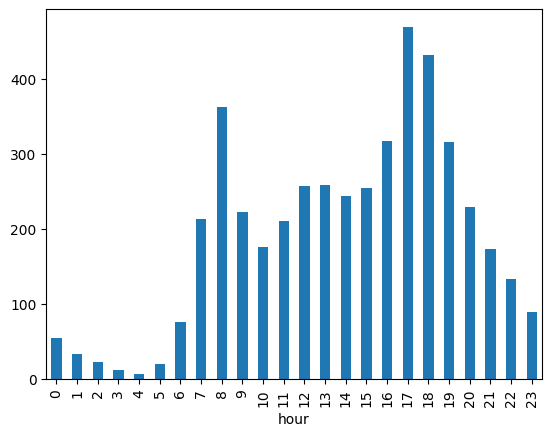

In [17]:
df['hour'] = df['datetime'].dt.hour
df.groupby('hour')['count'].mean().plot(kind='bar');

Виходячи з данних спостерігаємо, що найактуальніші години прокату, це час перед роботою (8 ранку) і години після робочого часу (17-19 вечора).
Як можливість цим скористатись, можна збільшувати пункти оренди біля великих бізнес центрів, щоб люди після роботи знали, що вони зможуть спокійно орендувати велосипед і доїхати додому.

3. Визначити як впливає температура на кількість орендованих велосипедів

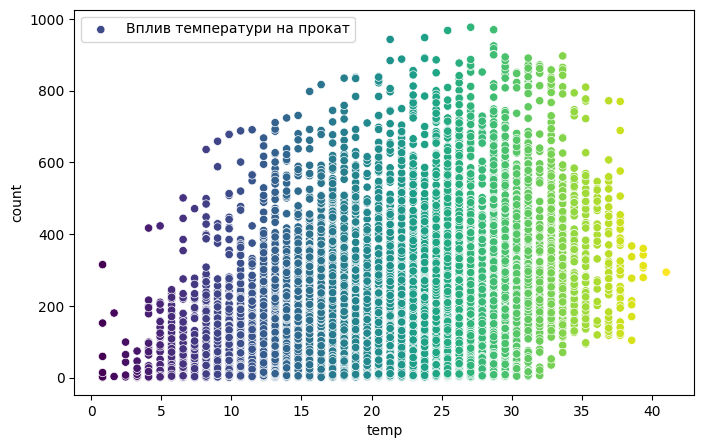

In [26]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='temp', y='count', c = df['temp'], label='Вплив температури на прокат');

З даного скатерплоту видно, що погода впливає на кількість прокатів. Найменш актуальні температури - нижче 10 градусів і вище 35 градусів. Користуючись цими даними, можна зробити акцент на тому, щоб збільшити кількість прокатиних велосипедів, саме в ті періоди, коли температура коливається в межах 20 градусів.